# ASSIGNMENT ON CLASSIFICATION

In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Reading dataset into the python environment.
iris = pd.read_excel(r"C:\Users\hp\Desktop\iris (2).xls")
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Preprocessing

In [5]:
iris.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [6]:
iris['Classification'].nunique()

3

In [7]:
iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

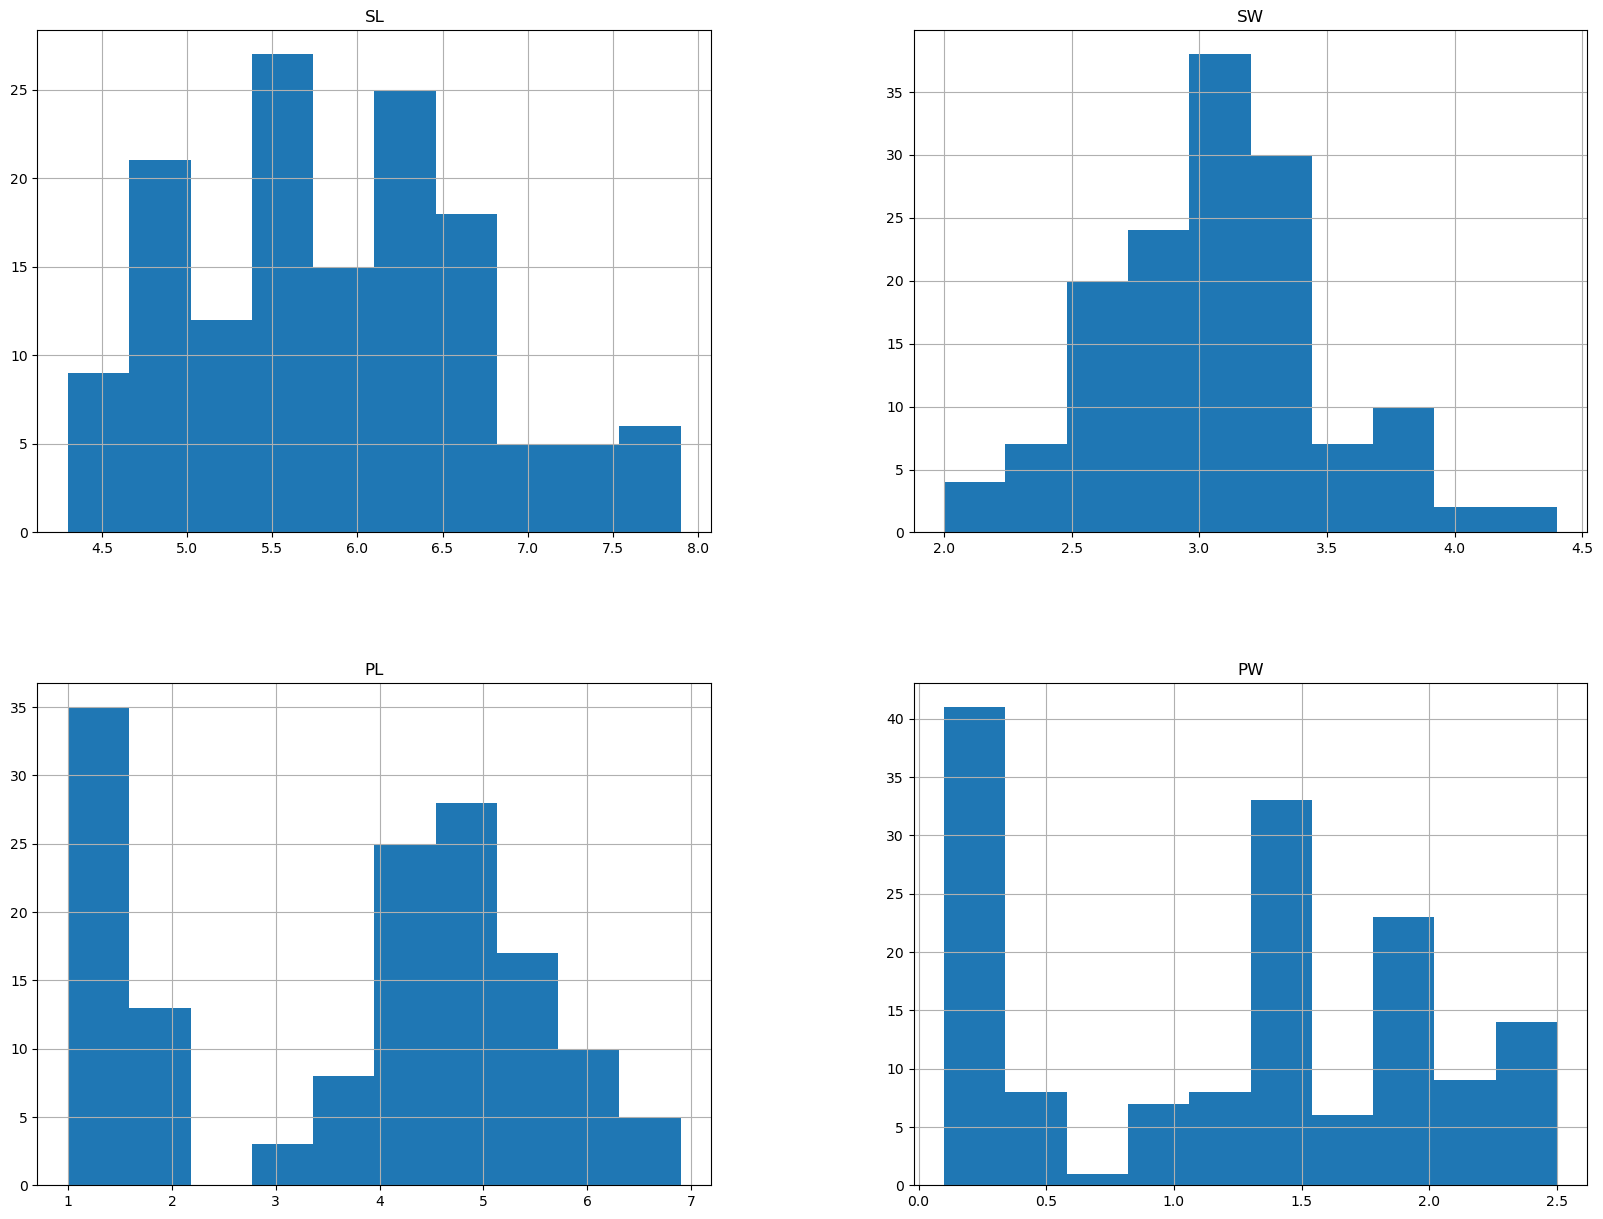

In [8]:
# Plotting a histogram to check whether the data is normally distributed or not.
freqgraph=iris.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,15));

In [9]:
# Filling Missing Values
iris['SL']=iris['SL'].fillna(iris['SL'].median())
iris['SW']=iris['SW'].fillna(iris['SW'].median())
iris['PL']=iris['PL'].fillna(iris['PL'].median())

In [10]:
x=iris.iloc[:,:4] #features
y=iris.iloc[:,4] #target

In [11]:
x.columns

Index(['SL', 'SW', 'PL', 'PW'], dtype='object')

In [12]:
#MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
minmax= MinMaxScaler(feature_range=(0,1))
x1=minmax.fit_transform(x)
x1=pd.DataFrame(x1,columns=['SL', 'SW', 'PL', 'PW'])
x1.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,0.431481,0.436389,0.471186,0.457778
std,0.224602,0.175831,0.293123,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.531250,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [13]:
# splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=42)

(i) Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
model=log_reg.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred))
print('Accuracy Score =',np.around(accuracy_score(y_test,y_pred)*100,2),'%')

Confusion Matrix 
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Accuracy Score = 96.67 %


(ii) k-NN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
model1=knn.fit(x_train,y_train)
y_pred_knn=model1.predict(x_test)
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_knn))
print('Accuracy Score =',accuracy_score(y_test,y_pred_knn)*100,'%')

Confusion Matrix 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy Score = 100.0 %


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


(iii) SVM

(iii.a) Linear

In [16]:
from sklearn.svm import SVC
svm_clf_l=SVC(kernel='linear')
svm_model_l=svm_clf_l.fit(x_train,y_train)
y_pred_svm_l=svm_clf_l.predict(x_test)
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_svm_l))
print('Accuracy Score =',accuracy_score(y_test,y_pred_svm_l)*100,'%')

Confusion Matrix 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy Score = 100.0 %


(iii.b) RBF

In [17]:
svm_clf_r=SVC(kernel='rbf')
svm_model_r=svm_clf_r.fit(x_train,y_train)
y_pred_svm_r=svm_clf_r.predict(x_test)
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_svm_r))
print('Accuracy Score =',np.around(accuracy_score(y_test,y_pred_svm_r)*100,2),'%')

Confusion Matrix 
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Accuracy Score = 96.67 %


(iii.c) Polynomial

In [18]:
svm_clf_p=SVC(kernel='poly',degree=2)
svm_model_p=svm_clf_p.fit(x_train,y_train)
y_pred_svm_p=svm_clf_p.predict(x_test)
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_svm_p))
print('Accuracy Score =',np.around(accuracy_score(y_test,y_pred_svm_p)*100,2),'%')

Confusion Matrix 
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Accuracy Score = 96.67 %


(iv) Decision Trees

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred_dt=dt_clf.predict(x_test)
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_dt))
print('Accuracy Score =',accuracy_score(y_test,y_pred_dt)*100,'%')

Confusion Matrix 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy Score = 100.0 %


(v) Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)
y_pred_rf=rf_clf.predict(x_test)
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_rf))
print('Accuracy Score =',accuracy_score(y_test,y_pred_rf)*100,'%')

Confusion Matrix 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy Score = 100.0 %


Inference:-

We can use k-NN or SVM Linear or Random Forest or Decision Trees for predicting the Classification of various flowers as they would be 100% accurate in their prediction.